# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment

In [2]:
iris_data=pd.read_excel(r"C:\Users\HP\Downloads\iris.xls")

In [3]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.shape

(150, 5)

 There are 150 rows and 5 columns in the given dataset

In [6]:
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are some null values in the column of SL,SW and PL

In [7]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The above shows numerical analysis of given dataset.The highest average is 5.855 and lowest average is 1.198.The std of PL is higher.

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2.Do necessary pre-processing steps.

# Filling missing values

In [9]:
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

From the above we can understand that there are null values in the column of SL,SW and PL.So we need to fill this null values

In [10]:
# filling null values in the column of SL
iris_data['SL']=iris_data['SL'].fillna(iris_data['SL'].mean())

In [11]:
iris_data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

We filled all the null values in the column of SL

In [12]:
# filling null values in the column of SW
iris_data['SW']=iris_data['SW'].fillna(iris_data['SW'].mean())

In [13]:
iris_data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

We filled all the null values in the column of SW

In [14]:
# filling null values in the column of PL
iris_data['PL']=iris_data['PL'].fillna(iris_data['PL'].mean())

In [15]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Finally we filled all null values in the given dataset

# Detect and Handling outliers

Text(0.5, 1.0, 'Box plot of SL')

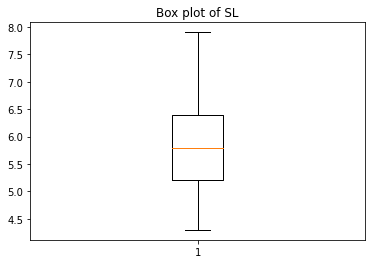

In [16]:
# dectect and handling ouliers of SL
plt.boxplot(iris_data['SL'])
plt.title('Box plot of SL')

There are not any outliers in the SL

Text(0.5, 1.0, 'Box plot of SW')

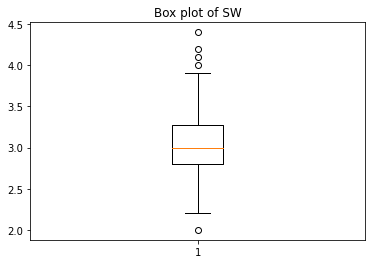

In [17]:
# dectect and handling ouliers of SW
plt.boxplot(iris_data['SW'])
plt.title('Box plot of SW')

There are some outliers in the column of SW.So we need to remove this outliers.

In [18]:
Q1=np.percentile(iris_data['SW'],25,interpolation='midpoint')
Q2=np.percentile(iris_data['SW'],50,interpolation='midpoint')
Q3=np.percentile(iris_data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [19]:
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [20]:
outlier=[]
for x in iris_data['SW']:
    if x>up_lim or x<low_lim:
        outlier.append(x)

In [21]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [22]:
index=iris_data['SW'][(iris_data['SW']>up_lim)|(iris_data['SW']<low_lim)].index
iris_data=iris_data.drop(index)

Text(0.5, 1.0, 'Box plot of SW')

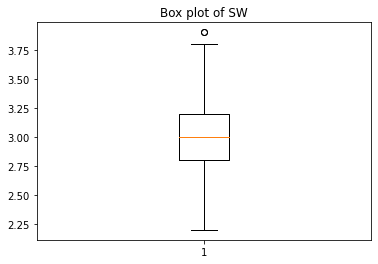

In [23]:
plt.boxplot(iris_data['SW'])
plt.title('Box plot of SW')

We removed outliers in the column of SW

Text(0.5, 1.0, 'Box plot of PL')

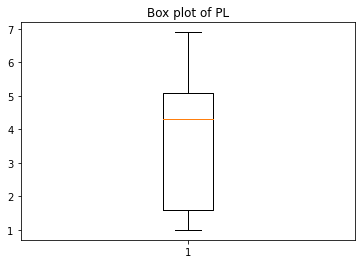

In [24]:
# dectect and handling outliers of PL
plt.boxplot(iris_data['PL'])
plt.title('Box plot of PL')

There are not any outliers in PL

Text(0.5, 1.0, 'Box plot of PW')

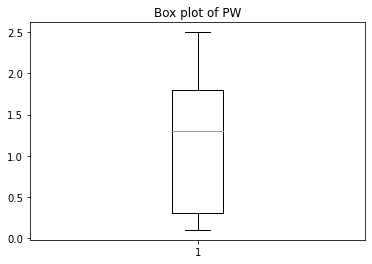

In [25]:
# dectect and handling outliers in PW
plt.boxplot(iris_data['PW'])
plt.title('Box plot of PW')

There are not any outliers in PW

# Label Encoding

In [26]:
from sklearn import preprocessing

In [27]:
iris_data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
oh=LabelEncoder()
iris_data.Classification=oh.fit_transform(iris_data.Classification)

In [30]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# Splitting the data to Features and target

In [31]:
x = iris_data.drop(columns=['Classification'])
y = iris_data['Classification']

# Standared Scalling

In [32]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.823017,1.226897
std,0.816690,0.374355,1.709115,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.300000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [33]:
from sklearn import preprocessing
standardization = preprocessing.StandardScaler()

In [34]:
x = standardization.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
mean,7.366713e-16,-2.558298e-16,-4.609340e-16,-5.206563e-17
std,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00
min,-1.929409e+00,-2.212740e+00,-1.657467e+00,-1.491392e+00
25%,-8.235806e-01,-6.044268e-01,-1.305192e+00,-1.226702e+00
50%,-1.762310e-02,-6.832248e-02,2.800491e-01,9.674884e-02
75%,6.508576e-01,4.677818e-01,7.497501e-01,7.584744e-01
max,2.493905e+00,2.344147e+00,1.806577e+00,1.684890e+00


# 3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [35]:
# Splitting data into train and test set

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [37]:
x_train.shape

(116, 4)

In [38]:
x_test.shape

(29, 4)

# logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [41]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9310344827586207
Precision:  0.9310344827586207
Recall:  0.9310344827586207
F1_score 0.9310344827586207


In [42]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [44]:
acc_values

[0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

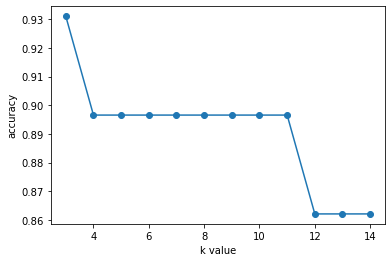

In [45]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [46]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [47]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9310344827586207
Precision:  0.9310344827586207
Recall:  0.9310344827586207
F1_score 0.9310344827586207


In [48]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

# Decision tree classification

In [49]:
from sklearn.tree import DecisionTreeClassifier
data_model=DecisionTreeClassifier()
data_model.fit(x_train,y_train)
y_pred=data_model.predict(x_test)

In [50]:
print('Accuracy on decision tree model is:',accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

Accuracy on decision tree model is: 0.896551724137931
Precision:  0.896551724137931
Recall:  0.896551724137931
F1_score 0.896551724137931


In [51]:
confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

# SVM

In [52]:
# Linear SVM

In [53]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [54]:
print('Accuracy on decision tree model is:',accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

Accuracy on decision tree model is: 0.9310344827586207
Precision:  0.9310344827586207
Recall:  0.9310344827586207
F1_score 0.9310344827586207


In [55]:
y_test.value_counts()

2    11
0     9
1     9
Name: Classification, dtype: int64

In [56]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [57]:
# Polynominal SVM

In [58]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [59]:
print('Accuracy on polynominal svm is:',accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

Accuracy on polynominal svm is: 0.896551724137931
Precision:  0.896551724137931
Recall:  0.896551724137931
F1_score 0.896551724137931


In [60]:
y_test.value_counts()

2    11
0     9
1     9
Name: Classification, dtype: int64

In [61]:
confusion_matrix(y_test,y_pred)#

array([[9, 0, 0],
       [0, 9, 0],
       [0, 3, 8]], dtype=int64)

In [62]:
# Radial SVM

In [63]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [64]:
print('Accuracy on radial svm is:',accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

Accuracy on radial svm is: 0.9310344827586207
Precision:  0.9310344827586207
Recall:  0.9310344827586207
F1_score 0.9310344827586207


In [65]:
y_test.value_counts()

2    11
0     9
1     9
Name: Classification, dtype: int64

In [66]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [68]:
print('Accuracy on radial svm is:',accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

Accuracy on radial svm is: 0.9310344827586207
Precision:  0.9310344827586207
Recall:  0.9310344827586207
F1_score 0.9310344827586207


In [69]:
y_test.value_counts()

2    11
0     9
1     9
Name: Classification, dtype: int64

In [70]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

From the above models tested on this dataset all the models except decision tree and polynomial svm have highest scores in accuracy,f1_score,recall and precision.All the models except this 2 models have the equal scores in accuracy,f1_score,recall and precision.So all the models except 2 will the best models to gives the best result to predict iris species.In confusion matrix,the main diagonal is correct prediction and rest is wrong prediction.  